<a href="https://colab.research.google.com/github/fadhan654/latihan1/blob/main/BigDataArsitektur11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336M,838,"66,853,633,536",US
1,2.0,T-Series,281M,"22,313","277,242,795,553",IN
2,3.0,Cocomelon-Nursery Rhymes,186M,1370,"194,361,752,276",US
3,4.0,Youtube Movies,185M,0,0,NaN
4,5.0,Set India,180M,"148,727","172,709,029,653",IN


<ipython-input-18-304dafd6d39d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Subscribers", y="Username", data=top_10, palette="viridis")


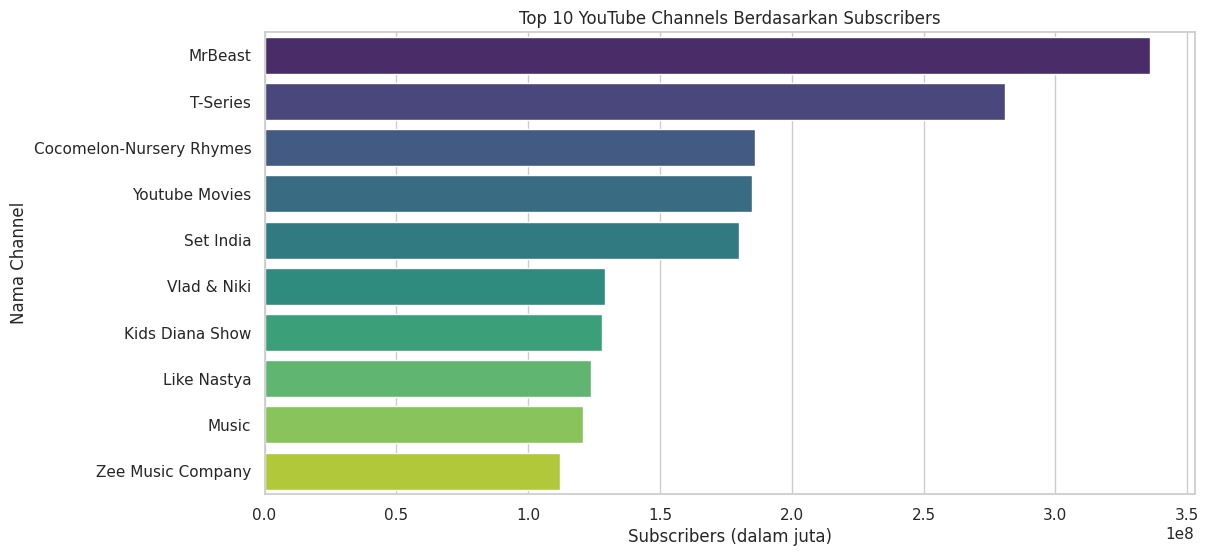

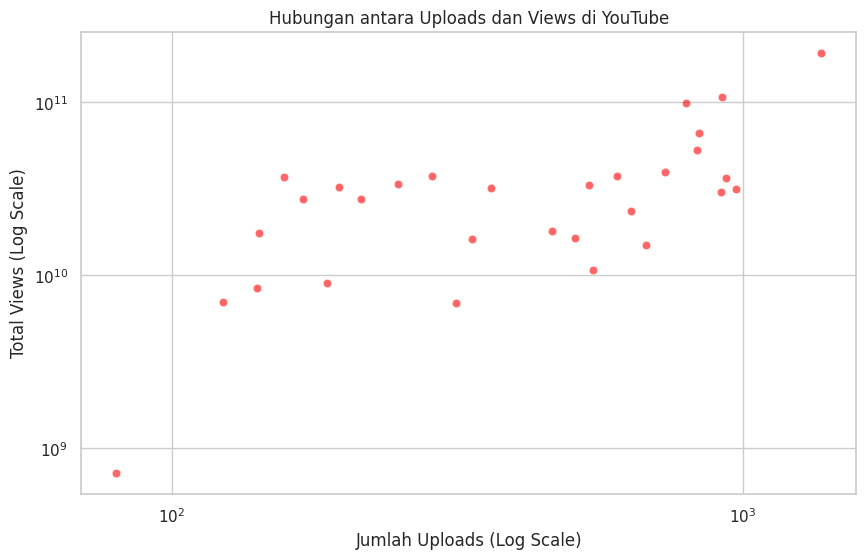

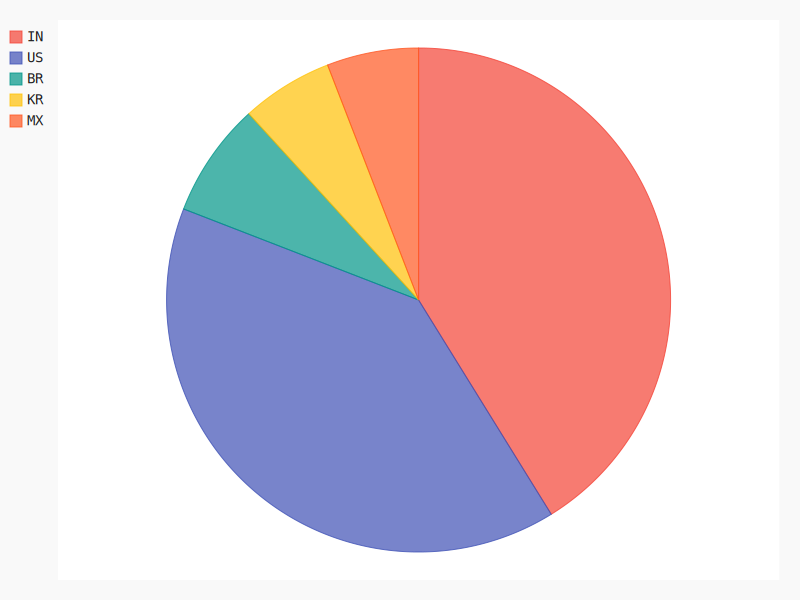

In [18]:
# Install Pygal (Hanya perlu dijalankan sekali di Google Colab)
!pip install pygal

# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygal
from IPython.display import display, SVG

# Load dataset
file_path = "/content/YOUTUBE CHANNELS DATASET.csv"
df = pd.read_csv(file_path)

# Tampilkan 5 data pertama untuk melihat strukturnya
display(df.head())

# Data Cleaning: Konversi nilai numerik ke format yang benar
df["Subscribers"] = df["Subscribers"].str.replace("M", "e6").str.replace("B", "e9").astype(float)
df["Uploads"] = pd.to_numeric(df["Uploads"], errors='coerce')
df["Views"] = df["Views"].str.replace(",", "").astype(float)

# 1. **Bar Chart: 10 Channel dengan Subscriber Terbanyak**
top_10 = df.nlargest(10, "Subscribers")

plt.figure(figsize=(12, 6))
sns.barplot(x="Subscribers", y="Username", data=top_10, palette="viridis")
plt.xlabel("Subscribers (dalam juta)")
plt.ylabel("Nama Channel")
plt.title("Top 10 YouTube Channels Berdasarkan Subscribers")
plt.show()

# 2. **Scatter Plot: Perbandingan Jumlah Uploads dan Views**
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Uploads", y="Views", data=df, alpha=0.6, color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Jumlah Uploads (Log Scale)")
plt.ylabel("Total Views (Log Scale)")
plt.title("Hubungan antara Uploads dan Views di YouTube")
plt.show()

# 3. **Pie Chart: Distribusi 5 Negara dengan Channel Terbanyak**
top_countries = df["Country"].value_counts().nlargest(5)

pie_chart = pygal.Pie()
for country, count in top_countries.items():
    pie_chart.add(country, count)

# Simpan dan tampilkan grafik Pie Chart
pie_chart.render_to_file('/content/top_countries_pie_chart.svg')
display(SVG('/content/top_countries_pie_chart.svg'))
